## Projeto - Fuzzy

#### Nome: Itamar Augusto Silva Ribeiro         Turma:   L4         Matrícula: 91


In [4]:
pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedente (entrada/input)

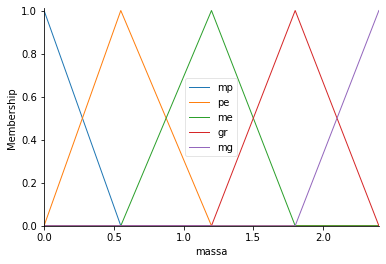

In [6]:
# Definindo universo de discurso e nome da variável
universo_massa = np.arange(0, 2.41, 0.01)

massa = control.Antecedent(universe = universo_massa, label = "massa")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
massa["mp"] = fuzzy.trimf(massa.universe, [0, 0, 0.55])
massa["pe"] = fuzzy.trimf(massa.universe, [0, 0.55, 1.2])
massa["me"] = fuzzy.trimf(massa.universe, [0.55, 1.2, 1.8])
massa["gr"] = fuzzy.trimf(massa.universe, [1.2, 1.8, 2.4])
massa["mg"] = fuzzy.trimf(massa.universe, [1.8, 2.4, 2.4])

massa.view()

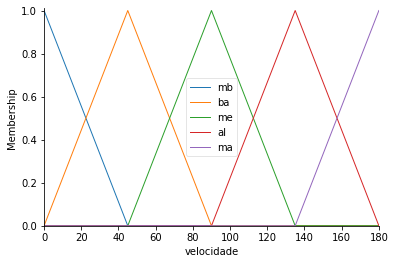

In [7]:
# Definindo universo de discurso e nome da variável
universo_velocidade = np.arange(0, 181)

velocidade = control.Antecedent(universe = universo_velocidade, label = "velocidade")

velocidade["mb"] = fuzzy.trimf(velocidade.universe, [0,0,45])
velocidade["ba"] = fuzzy.trimf(velocidade.universe, [0,45,90])
velocidade["me"] = fuzzy.trimf(velocidade.universe, [45,90,135])
velocidade["al"] = fuzzy.trimf(velocidade.universe, [90,135,180])
velocidade["ma"] = fuzzy.trimf(velocidade.universe, [135,180,180])

velocidade.view()

#### Criando consequent (saída/output)

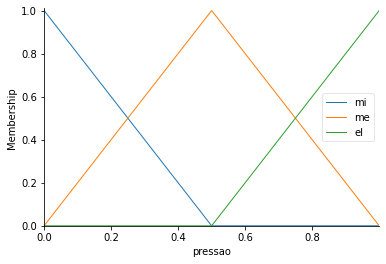

In [9]:
# Universo da gorjeta
universo_pressao = np.arange(0, 1, 0.001)

pressao = control.Consequent(universe = universo_pressao, label = "pressao")

pressao["mi"] = fuzzy.trimf(pressao.universe, [0,0,0.5])
pressao["me"] = fuzzy.trimf(pressao.universe, [0,0.5,1])
pressao["el"] = fuzzy.trimf(pressao.universe, [0.5,1,1])


pressao.view()


#### Criando regras

In [10]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule((velocidade["mb"] & massa["mp"]) |
                      (velocidade["mb"] & massa["pe"]) |
                      (velocidade["mb"] & massa["me"]), pressao["mi"]
                     )

regra2 = control.Rule((velocidade["mb"] & massa["gr"]) |
                      (velocidade["mb"] & massa["mg"]), pressao["me"]
                      )

regra3 = control.Rule((velocidade["ba"] & massa["mp"]) |
                      (velocidade["ba"] & massa["pe"]) |
                      (velocidade["ba"] & massa["me"]), pressao["mi"]
                     )

regra4 = control.Rule((velocidade["ba"] & massa["gr"]) |
                      (velocidade["ba"] & massa["mg"]), pressao["me"]
                      )

regra5 = control.Rule((velocidade["me"] & massa["mp"]) |
                      (velocidade["me"] & massa["pe"]), pressao["mi"]
                     )

regra6 = control.Rule((velocidade["me"] & massa["me"]), pressao["me"])

regra7 = control.Rule((velocidade["me"] & massa["gr"]) |
                      (velocidade["me"] & massa["mg"]), pressao["el"]
                      )

regra8 = control.Rule((velocidade["al"] & massa["mp"]) |
                      (velocidade["al"] & massa["pe"]) |
                      (velocidade["al"] & massa["me"]), pressao["me"]
                     )

regra9 = control.Rule((velocidade["al"] & massa["gr"]) |
                      (velocidade["al"] & massa["mg"]), pressao["el"]
                      )

regra10 = control.Rule((velocidade["ma"] & massa["mp"]) |
                      (velocidade["ma"] & massa["pe"]) |
                      (velocidade["ma"] & massa["me"]), pressao["me"]
                      )

regra11 = control.Rule((velocidade["ma"] & massa["gr"]) |
                      (velocidade["ma"] & massa["mg"]), pressao["el"]
                      )

#### Criando sistema

In [25]:
# Adicionando regras ao controle
pressao_controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9,
                                         regra10, regra11])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(pressao_controle)

In [39]:
sistema.input["velocidade"] = 155
sistema.input["massa"] = 1.5

# Executando o sistema

sistema.compute()

print(f"Resposta: {round(sistema.output['pressao'],2)} atm")

Resposta: 0.56 atm
